In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# data
d2024 = pd.read_csv('data\produccin-de-pozos-de-gas-y-petrleo-2024.csv', low_memory=False)
# d2023 = pd.read_csv('data\produccin-de-pozos-de-gas-y-petrleo-2023.csv', low_memory=False)
# d2022 = pd.read_csv('data\produccin-de-pozos-de-gas-y-petrleo-2022.csv', low_memory=False)
# d2021 = pd.read_csv('data\produccin-de-pozos-de-gas-y-petrleo-2021.csv', low_memory=False)

In [176]:
pd.set_option('display.max_columns', None)
d2024.tail()

,idempresa,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_otro,tef,vida_util,tipoextraccion,tipoestado,tipopozo,observaciones,fechaingreso,rectificado,habilitado,idusuario,empresa,sigla,formprod,profundidad,formacion,idareapermisoconcesion,areapermisoconcesion,idareayacimiento,areayacimiento,cuenca,provincia,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso,fecha_data
242432,ACO,2024,2,8409,215.76,8.63,1011.10,0.0,0.0,0.0,0.0,28.87,NaN,Bombeo Mecánico,Extracción Efectiva,Petrolífero,ACO,2024-03-05 16:00:51.912844,f,t,459,Petrolera Aconcagua Energia S.A.,CHE.Md.CH-1023,BARR,3604.0,barrancas,CHA,CHAÑARES HERRADOS,CHA,CHAÑARES HERRADOS,CUYANA,Mendoza,CONVENCIONAL,Sin Proyecto,NaN,NaN,NaN,2024-02-29
242433,ACO,2024,2,8382,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,NaN,Bombeo Mecánico,Parado Transitoriamente,Petrolífero,ACO,2024-03-05 16:00:51.912844,f,t,459,Petrolera Aconcagua Energia S.A.,CHE.Md.CH-24,RBCO,3250.0,rio blanco,CHA,CHAÑARES HERRADOS,CHA,CHAÑARES HERRADOS,CUYANA,Mendoza,CONVENCIONAL,Sin Proyecto,NaN,NaN,NaN,2024-02-29
242434,ACO,2024,2,610,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,NaN,Sin Sistema de Extracción,Abandonado,Petrolífero,ACO,2024-03-05 16:00:51.912844,f,t,459,Petrolera Aconcagua Energia S.A.,CHE.Md.CH-30,BARR,3252.0,barrancas,CHA,CHAÑARES HERRADOS,CHA,CHAÑARES HERRADOS,CUYANA,Mendoza,CONVENCIONAL,Sin Proyecto,NaN,NaN,NaN,2024-02-29
242435,ACO,2024,2,136816,64.47,2.58,350.96,0.0,0.0,0.0,0.0,28.87,NaN,Bombeo Mecánico,Extracción Efectiva,Petrolífero,ACO,2024-03-05 16:00:51.912844,f,t,459,Petrolera Aconcagua Energia S.A.,CHE.Md.CH-1072,RBCO,3280.0,rio blanco,CHA,CHAÑARES HERRADOS,CHA,CHAÑARES HERRADOS,CUYANA,Mendoza,CONVENCIONAL,Sin Proyecto,NaN,NaN,NaN,2024-02-29
242436,ACO,2024,2,8411,82.44,3.30,115.52,0.0,0.0,0.0,0.0,28.87,NaN,Bombeo Mecánico,Extracción Efectiva,Petrolífero,ACO,2024-03-05 16:00:51.912844,f,t,459,Petrolera Aconcagua Energia S.A.,CHE.Md.CH-1030,BARR,3552.0,barrancas,CHA,CHAÑARES HERRADOS,CHA,CHAÑARES HERRADOS,CUYANA,Mendoza,CONVENCIONAL,Sin Proyecto,NaN,NaN,NaN,2024-02-29


In [5]:
d2024.isna().sum()

idempresa                      0
anio                           0
mes                            0
idpozo                         0
prod_pet                       0
prod_gas                       0
prod_agua                      0
iny_agua                       0
iny_gas                        0
iny_co2                        0
iny_otro                       0
tef                            0
vida_util                 237292
tipoextraccion                10
tipoestado                    10
tipopozo                      10
observaciones             227177
fechaingreso                   0
rectificado                    0
habilitado                     0
idusuario                      0
empresa                        0
sigla                          0
formprod                    8040
profundidad                    0
formacion                   8379
idareapermisoconcesion         0
areapermisoconcesion           0
idareayacimiento               0
areayacimiento                 0
cuenca    

In [216]:
# Limpieza de df
useful_columns = d2024[['anio','mes','idpozo','prod_pet','prod_gas','prod_agua','iny_agua','iny_gas','iny_co2','iny_otro','tipoextraccion','tipoestado','tipopozo','empresa','profundidad','cuenca','provincia','fecha_data']]

d = useful_columns.dropna()


# Sub df para Mes, tipoEstado 
unique_mes = d['mes'].unique()
sub_mes = {}
for n in unique_mes:
    sub_mes[n] = d.loc[d['mes'] == n]

unique_tipoestado = d["tipoestado"].unique()
sub_tipoestado = {}
for tipo in unique_tipoestado:
    sub_tipoestado[tipo] = d[d['tipoestado'] == tipo]

d.head()

,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_otro,tipoextraccion,tipoestado,tipopozo,empresa,profundidad,cuenca,provincia,fecha_data
0,2024,1,145622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,Abandonado,Petrolífero,PETROLERA DEL COMAHUE S.A.,2402.0,NEUQUINA,Rio Negro,2024-01-31
1,2024,1,145624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,Abandonado,Petrolífero,PETROLERA DEL COMAHUE S.A.,2507.0,NEUQUINA,Rio Negro,2024-01-31
2,2024,1,145626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,Abandonado,Petrolífero,PETROLERA DEL COMAHUE S.A.,1903.0,NEUQUINA,Rio Negro,2024-01-31
3,2024,1,145625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,Abandonado,Petrolífero,PETROLERA DEL COMAHUE S.A.,2707.0,NEUQUINA,Rio Negro,2024-01-31
4,2024,1,145623,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Plunger Lift,Abandonado,Petrolífero,PETROLERA DEL COMAHUE S.A.,2500.0,NEUQUINA,Rio Negro,2024-01-31


##### Cantidad de pozos en cada provincia al mes marzo del 2024

provincia
Santa Cruz          23432
Chubut              20911
Neuquén             17799
Mendoza              8556
Rio Negro            3639
La Pampa             2687
Tierra del Fuego     1235
Salta                 894
Formosa                64
Estado Nacional        61
Jujuy                  46
Name: count, dtype: int64


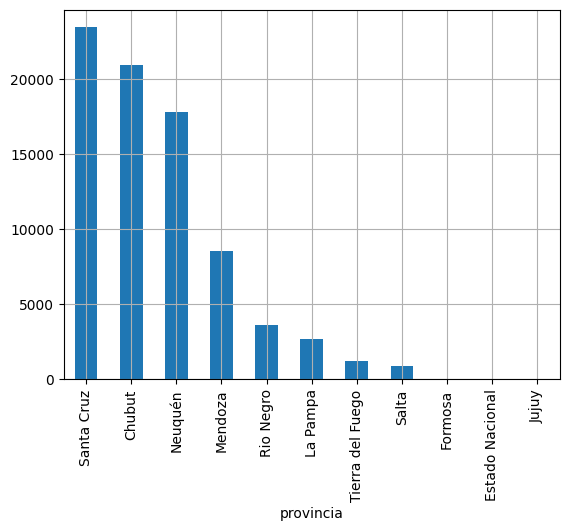

In [234]:
# Working it
marzo = sub_mes[3]

print(marzo['provincia'].value_counts())
marzo['provincia'].value_counts().plot(kind='bar')

plt.grid()
plt.show()

In [210]:
sub_tipoestado['Extracción Efectiva'].loc[sub_tipoestado['Extracción Efectiva']['provincia'] == 'Chubut']

,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,iny_otro,tipoextraccion,tipoestado,tipopozo,empresa,profundidad,cuenca,provincia,fecha_data
25,2024,2,145613,0.00,0.00,0.00,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,Abandonado,Petrolífero,PETROLERA DEL COMAHUE S.A.,3016.0,NEUQUINA,Rio Negro,2024-02-29
26,2024,2,145623,0.00,0.00,0.00,0.0,0.0,0.0,0.0,Plunger Lift,Abandonado,Petrolífero,PETROLERA DEL COMAHUE S.A.,2500.0,NEUQUINA,Rio Negro,2024-02-29
27,2024,2,145612,0.00,0.00,0.00,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,En Estudio,Petrolífero,PETROLERA DEL COMAHUE S.A.,2530.0,NEUQUINA,Rio Negro,2024-02-29
28,2024,2,145617,0.00,0.00,0.00,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,Abandonado,Petrolífero,PETROLERA DEL COMAHUE S.A.,2023.0,NEUQUINA,Rio Negro,2024-02-29
29,2024,2,145621,0.00,0.00,0.00,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,Abandonado,Petrolífero,PETROLERA DEL COMAHUE S.A.,2015.0,NEUQUINA,Rio Negro,2024-02-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242432,2024,2,8409,215.76,8.63,1011.10,0.0,0.0,0.0,0.0,Bombeo Mecánico,Extracción Efectiva,Petrolífero,Petrolera Aconcagua Energia S.A.,3604.0,CUYANA,Mendoza,2024-02-29
242433,2024,2,8382,0.00,0.00,0.00,0.0,0.0,0.0,0.0,Bombeo Mecánico,Parado Transitoriamente,Petrolífero,Petrolera Aconcagua Energia S.A.,3250.0,CUYANA,Mendoza,2024-02-29
242434,2024,2,610,0.00,0.00,0.00,0.0,0.0,0.0,0.0,Sin Sistema de Extracción,Abandonado,Petrolífero,Petrolera Aconcagua Energia S.A.,3252.0,CUYANA,Mendoza,2024-02-29
242435,2024,2,136816,64.47,2.58,350.96,0.0,0.0,0.0,0.0,Bombeo Mecánico,Extracción Efectiva,Petrolífero,Petrolera Aconcagua Energia S.A.,3280.0,CUYANA,Mendoza,2024-02-29
